In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання:
## 1. На основі опитування 5 або більше експертів задати нечітку множину "чоловік середнього зросту"
Будуємо таблицю опитування

In [2]:
scores = np.array(
    [
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    ]
)

idx_names = [f'$b^{i + 1}$' for i in range(scores.shape[0])]
col_names = [f'$x_{{{i}}}\;({h}\;cm)$' for i, h in enumerate(range(150, 201, 5), 1)]
df = pd.DataFrame(scores, idx_names, col_names)
df

,$x_{1}\;(150\;cm)$,$x_{2}\;(155\;cm)$,$x_{3}\;(160\;cm)$,$x_{4}\;(165\;cm)$,$x_{5}\;(170\;cm)$,$x_{6}\;(175\;cm)$,$x_{7}\;(180\;cm)$,$x_{8}\;(185\;cm)$,$x_{9}\;(190\;cm)$,$x_{10}\;(195\;cm)$,$x_{11}\;(200\;cm)$
$b^1$,0,0,1,1,1,1,1,1,0,0,0
$b^2$,0,0,0,1,1,1,1,1,0,0,0
$b^3$,0,0,0,0,1,1,1,0,0,0,0
$b^4$,0,0,0,0,1,1,0,0,0,0,0
$b^5$,0,0,0,0,0,1,0,0,0,0,0


Розраховуємо функцію приналежності

In [3]:
mem_func = df.mean()
mem_func = pd.DataFrame([mem_func / mem_func.max()], ["$\mu'_{Aj}(x)$"])
mem_func

,$x_{1}\;(150\;cm)$,$x_{2}\;(155\;cm)$,$x_{3}\;(160\;cm)$,$x_{4}\;(165\;cm)$,$x_{5}\;(170\;cm)$,$x_{6}\;(175\;cm)$,$x_{7}\;(180\;cm)$,$x_{8}\;(185\;cm)$,$x_{9}\;(190\;cm)$,$x_{10}\;(195\;cm)$,$x_{11}\;(200\;cm)$
$\mu'_{Aj}(x)$,0.0,0.0,0.2,0.4,0.8,1.0,0.6,0.4,0.0,0.0,0.0


## 2. Апроксимувати функцію приналежності за допомогою трапецевидної кусково-лінійної функції 

In [4]:
a, b, c, d = 150, 170, 180, 190
x = np.linspace(140, 200, 100)
approx_mem_func = np.piecewise(
    x,
    [(x <= a) | (x > d), (a < x) & (x <= b), (b < x) & (x <= c), (c < x) & (x <= d)],
    [0, lambda x: (x - a) / (b - a), 1, lambda x: (d - x) / (d - c)]
)

## 3. Побудувати графіки двох функій

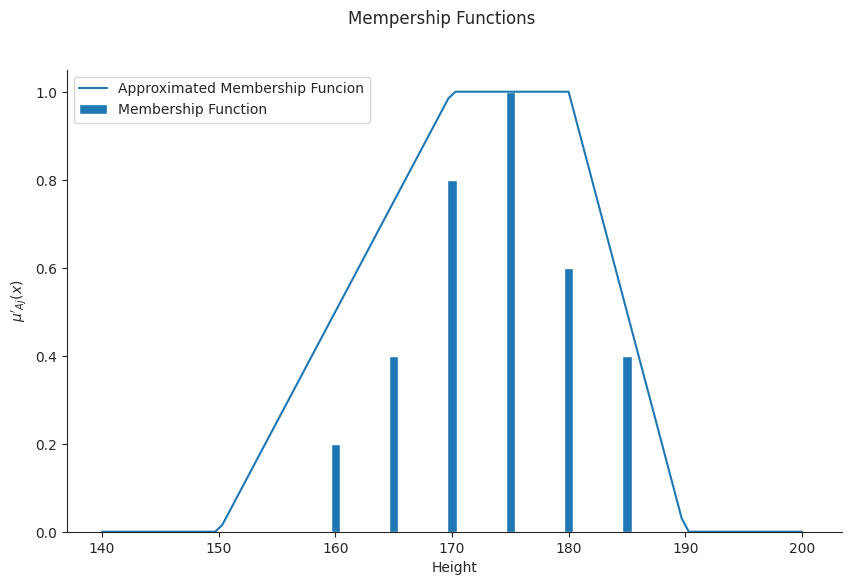

In [5]:
plt.figure(figsize=(10, 6))
plt.suptitle('Mempership Functions')
plt.bar(range(150, 201, 5), mem_func.iloc[0], label='Membership Function')
plt.plot(x, approx_mem_func, label='Approximated Membership Funcion')
plt.xlabel('Height')
plt.ylabel("$\mu'_{Aj}(x)$")
plt.legend()
sns.despine()

## 4. Визначити носій нечіткої множини, її ядро та межі

In [6]:
print('Support of A:', x[approx_mem_func > 0])
print('Core of A:', x[approx_mem_func == 1])
print('Bounds of A:', x[(approx_mem_func > 0) & (approx_mem_func < 1)])

Support of A: [150.3030303  150.90909091 151.51515152 152.12121212 152.72727273
 153.33333333 153.93939394 154.54545455 155.15151515 155.75757576
 156.36363636 156.96969697 157.57575758 158.18181818 158.78787879
 159.39393939 160.         160.60606061 161.21212121 161.81818182
 162.42424242 163.03030303 163.63636364 164.24242424 164.84848485
 165.45454545 166.06060606 166.66666667 167.27272727 167.87878788
 168.48484848 169.09090909 169.6969697  170.3030303  170.90909091
 171.51515152 172.12121212 172.72727273 173.33333333 173.93939394
 174.54545455 175.15151515 175.75757576 176.36363636 176.96969697
 177.57575758 178.18181818 178.78787879 179.39393939 180.
 180.60606061 181.21212121 181.81818182 182.42424242 183.03030303
 183.63636364 184.24242424 184.84848485 185.45454545 186.06060606
 186.66666667 187.27272727 187.87878788 188.48484848 189.09090909
 189.6969697 ]
Core of A: [170.3030303  170.90909091 171.51515152 172.12121212 172.72727273
 173.33333333 173.93939394 174.54545455 175.